<a href="https://colab.research.google.com/github/Paupau20/Colab/blob/main/Proyecto_Final_Inferencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files
import plotly.graph_objs as go
import plotly.offline as pyo
import seaborn as sns
from matplotlib.lines import Line2D #para legenda
from sklearn.linear_model import LinearRegression
import plotly.express as px

In [ ]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
df = pd.read_excel("/content/gdrive/MyDrive/Proyecto Inferencia/Formulario sin título (Responses).xlsx")
df

,Edad,Género,Área,Pensado,Edad_jubilación,Ahorras_o_inviertes,En_ahorrar,Enfermedades,Dinero_jubilar,Hacer_jubilar
0,21,Mujer,Ciencias físico-matemáticas y de las ingenierías,Sí,61-65,Ambos,Vejez/Retiro,Sí,"50,000-100,000",Otro
1,21,Mujer,Ciencias físico-matemáticas y de las ingenierías,Sí,56-60,Ahorro,Gustos,Sí,"25,000-50,000",Hacer turismo
2,22,Mujer,Ciencias físico-matemáticas y de las ingenierías,Sí,61-65,Ahorro,Deudas,Sí,"25,000-50,000",Otro
3,21,Hombre,Ciencias físico-matemáticas y de las ingenierías,Sí,61-65,Ninguno,NaN,No,"25,000-50,000",Realizar actividades recreativas/deportivas
4,21,Hombre,Ciencias físico-matemáticas y de las ingenierías,Sí,50-55,Ambos,Independencia,No,"50,000-100,000",Realizar actividades recreativas/deportivas
...,...,...,...,...,...,...,...,...,...,...
90,22,Mujer,Humanidades y Artes,No,50-55,Ahorro,Gustos,No,"Más de 100,000",Realizar actividades recreativas/deportivas
91,21,Mujer,Ciencias físico-matemáticas y de las ingenierías,No,61-65,Invierto,NaN,No se,"25,000-50,000",Realizar actividades recreativas/deportivas
92,22,Mujer,Ciencias físico-matemáticas y de las ingenierías,Sí,56-60,Invierto,NaN,No,"Más de 100,000",Realizar actividades recreativas/deportivas
93,23,Hombre,Humanidades y Artes,Sí,Menos de 50,Ambos,Casa,No,"Más de 100,000",Seguir trabajando


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Edad                 95 non-null     object
 1   Género               95 non-null     object
 2   Área                 95 non-null     object
 3   Pensado              95 non-null     object
 4   Edad_jubilación      95 non-null     object
 5   Ahorras_o_inviertes  95 non-null     object
 6   En_ahorrar           59 non-null     object
 7   Enfermedades         95 non-null     object
 8   Dinero_jubilar       95 non-null     object
 9   Hacer_jubilar        95 non-null     object
dtypes: object(10)
memory usage: 7.5+ KB


In [ ]:
#Vemos que datos hacen falta
df.isna().sum()

Edad                    0
Género                  0
Área                    0
Pensado                 0
Edad_jubilación         0
Ahorras_o_inviertes     0
En_ahorrar             36
Enfermedades            0
Dinero_jubilar          0
Hacer_jubilar           0
dtype: int64

In [ ]:
df.shape

(95, 10)

In [ ]:
df['En_ahorrar'].fillna('NA', inplace=True)
df

,Edad,Género,Área,Pensado,Edad_jubilación,Ahorras_o_inviertes,En_ahorrar,Enfermedades,Dinero_jubilar,Hacer_jubilar
0,21,Mujer,Ciencias físico-matemáticas y de las ingenierías,Sí,61-65,Ambos,Vejez/Retiro,Sí,"50,000-100,000",Otro
1,21,Mujer,Ciencias físico-matemáticas y de las ingenierías,Sí,56-60,Ahorro,Gustos,Sí,"25,000-50,000",Hacer turismo
2,22,Mujer,Ciencias físico-matemáticas y de las ingenierías,Sí,61-65,Ahorro,Deudas,Sí,"25,000-50,000",Otro
3,21,Hombre,Ciencias físico-matemáticas y de las ingenierías,Sí,61-65,Ninguno,NA,No,"25,000-50,000",Realizar actividades recreativas/deportivas
4,21,Hombre,Ciencias físico-matemáticas y de las ingenierías,Sí,50-55,Ambos,Independencia,No,"50,000-100,000",Realizar actividades recreativas/deportivas
...,...,...,...,...,...,...,...,...,...,...
90,22,Mujer,Humanidades y Artes,No,50-55,Ahorro,Gustos,No,"Más de 100,000",Realizar actividades recreativas/deportivas
91,21,Mujer,Ciencias físico-matemáticas y de las ingenierías,No,61-65,Invierto,NA,No se,"25,000-50,000",Realizar actividades recreativas/deportivas
92,22,Mujer,Ciencias físico-matemáticas y de las ingenierías,Sí,56-60,Invierto,NA,No,"Más de 100,000",Realizar actividades recreativas/deportivas
93,23,Hombre,Humanidades y Artes,Sí,Menos de 50,Ambos,Casa,No,"Más de 100,000",Seguir trabajando


In [ ]:
mapeo_genero = {'Hombre': 0, 'Mujer': 1}

# Aplicamos el mapeo a la columna 'género'
df['Género'] = df['Género'].map(mapeo_genero)
df

,Edad,Género,Área,Pensado,Edad_jubilación,Ahorras_o_inviertes,En_ahorrar,Enfermedades,Dinero_jubilar,Hacer_jubilar
0,21,1,Ciencias físico-matemáticas y de las ingenierías,Sí,61-65,Ambos,Vejez/Retiro,Sí,"50,000-100,000",Otro
1,21,1,Ciencias físico-matemáticas y de las ingenierías,Sí,56-60,Ahorro,Gustos,Sí,"25,000-50,000",Hacer turismo
2,22,1,Ciencias físico-matemáticas y de las ingenierías,Sí,61-65,Ahorro,Deudas,Sí,"25,000-50,000",Otro
3,21,0,Ciencias físico-matemáticas y de las ingenierías,Sí,61-65,Ninguno,NA,No,"25,000-50,000",Realizar actividades recreativas/deportivas
4,21,0,Ciencias físico-matemáticas y de las ingenierías,Sí,50-55,Ambos,Independencia,No,"50,000-100,000",Realizar actividades recreativas/deportivas
...,...,...,...,...,...,...,...,...,...,...
90,22,1,Humanidades y Artes,No,50-55,Ahorro,Gustos,No,"Más de 100,000",Realizar actividades recreativas/deportivas
91,21,1,Ciencias físico-matemáticas y de las ingenierías,No,61-65,Invierto,NA,No se,"25,000-50,000",Realizar actividades recreativas/deportivas
92,22,1,Ciencias físico-matemáticas y de las ingenierías,Sí,56-60,Invierto,NA,No,"Más de 100,000",Realizar actividades recreativas/deportivas
93,23,0,Humanidades y Artes,Sí,Menos de 50,Ambos,Casa,No,"Más de 100,000",Seguir trabajando


In [ ]:
df['Área'].unique()

array(['Ciencias físico-matemáticas y de las ingenierías',
       'Humanidades y Artes',
       'Ciencias Biológicas, químicas y de la salud', 'Ciencias Sociales'],
      dtype=object)

In [ ]:
mapeo_area = {'Ciencias físico-matemáticas y de las ingenierías': 1, 'Ciencias Biológicas, químicas y de la salud': 2,
                'Ciencias Sociales': 3, 'Humanidades y Artes': 4}

# Aplicamos el mapeo a la columna 'género'
df['Área'] = df['Área'].map(mapeo_area)
df

,Edad,Género,Área,Pensado,Edad_jubilación,Ahorras_o_inviertes,En_ahorrar,Enfermedades,Dinero_jubilar,Hacer_jubilar
0,21,1,1,Sí,61-65,Ambos,Vejez/Retiro,Sí,"50,000-100,000",Otro
1,21,1,1,Sí,56-60,Ahorro,Gustos,Sí,"25,000-50,000",Hacer turismo
2,22,1,1,Sí,61-65,Ahorro,Deudas,Sí,"25,000-50,000",Otro
3,21,0,1,Sí,61-65,Ninguno,NA,No,"25,000-50,000",Realizar actividades recreativas/deportivas
4,21,0,1,Sí,50-55,Ambos,Independencia,No,"50,000-100,000",Realizar actividades recreativas/deportivas
...,...,...,...,...,...,...,...,...,...,...
90,22,1,4,No,50-55,Ahorro,Gustos,No,"Más de 100,000",Realizar actividades recreativas/deportivas
91,21,1,1,No,61-65,Invierto,NA,No se,"25,000-50,000",Realizar actividades recreativas/deportivas
92,22,1,1,Sí,56-60,Invierto,NA,No,"Más de 100,000",Realizar actividades recreativas/deportivas
93,23,0,4,Sí,Menos de 50,Ambos,Casa,No,"Más de 100,000",Seguir trabajando


In [ ]:
mapeo_pensado = {'No': 0, 'Sí': 1}

# Aplicamos el mapeo a la columna 'género'
df['Pensado'] = df['Pensado'].map(mapeo_pensado)
df

,Edad,Género,Área,Pensado,Edad_jubilación,Ahorras_o_inviertes,En_ahorrar,Enfermedades,Dinero_jubilar,Hacer_jubilar
0,21,1,1,1,61-65,Ambos,Vejez/Retiro,Sí,"50,000-100,000",Otro
1,21,1,1,1,56-60,Ahorro,Gustos,Sí,"25,000-50,000",Hacer turismo
2,22,1,1,1,61-65,Ahorro,Deudas,Sí,"25,000-50,000",Otro
3,21,0,1,1,61-65,Ninguno,NA,No,"25,000-50,000",Realizar actividades recreativas/deportivas
4,21,0,1,1,50-55,Ambos,Independencia,No,"50,000-100,000",Realizar actividades recreativas/deportivas
...,...,...,...,...,...,...,...,...,...,...
90,22,1,4,0,50-55,Ahorro,Gustos,No,"Más de 100,000",Realizar actividades recreativas/deportivas
91,21,1,1,0,61-65,Invierto,NA,No se,"25,000-50,000",Realizar actividades recreativas/deportivas
92,22,1,1,1,56-60,Invierto,NA,No,"Más de 100,000",Realizar actividades recreativas/deportivas
93,23,0,4,1,Menos de 50,Ambos,Casa,No,"Más de 100,000",Seguir trabajando


In [ ]:
mapeo_enfermedades = {'No': 0, 'Sí': 1, 'No se': 2}

# Aplicamos el mapeo a la columna 'género'
df['Enfermedades'] = df['Enfermedades'].map(mapeo_enfermedades)
df

,Edad,Género,Área,Pensado,Edad_jubilación,Ahorras_o_inviertes,En_ahorrar,Enfermedades,Dinero_jubilar,Hacer_jubilar
0,21,1,1,1,61-65,Ambos,Vejez/Retiro,1,"50,000-100,000",Otro
1,21,1,1,1,56-60,Ahorro,Gustos,1,"25,000-50,000",Hacer turismo
2,22,1,1,1,61-65,Ahorro,Deudas,1,"25,000-50,000",Otro
3,21,0,1,1,61-65,Ninguno,NA,0,"25,000-50,000",Realizar actividades recreativas/deportivas
4,21,0,1,1,50-55,Ambos,Independencia,0,"50,000-100,000",Realizar actividades recreativas/deportivas
...,...,...,...,...,...,...,...,...,...,...
90,22,1,4,0,50-55,Ahorro,Gustos,0,"Más de 100,000",Realizar actividades recreativas/deportivas
91,21,1,1,0,61-65,Invierto,NA,2,"25,000-50,000",Realizar actividades recreativas/deportivas
92,22,1,1,1,56-60,Invierto,NA,0,"Más de 100,000",Realizar actividades recreativas/deportivas
93,23,0,4,1,Menos de 50,Ambos,Casa,0,"Más de 100,000",Seguir trabajando


In [ ]:
df['Dinero_jubilar'].unique()

array(['50,000-100,000', '25,000-50,000', 'Más de 100,000',
       '10,000-25,000', 'Menos de 10,000'], dtype=object)

In [ ]:
mapeo_dinero = {'Menos de 10,000': 0, '10,000-25,000': 1, '25,000-50,000': 2, '50,000-100,000': 3, 'Más de 100,000': 5}

# Aplicamos el mapeo a la columna 'género'
df['Dinero_jubilar'] = df['Dinero_jubilar'].map(mapeo_dinero)
df

,Edad,Género,Área,Pensado,Edad_jubilación,Ahorras_o_inviertes,En_ahorrar,Enfermedades,Dinero_jubilar,Hacer_jubilar
0,21,1,1,1,61-65,Ambos,Vejez/Retiro,1,3,Otro
1,21,1,1,1,56-60,Ahorro,Gustos,1,2,Hacer turismo
2,22,1,1,1,61-65,Ahorro,Deudas,1,2,Otro
3,21,0,1,1,61-65,Ninguno,NA,0,2,Realizar actividades recreativas/deportivas
4,21,0,1,1,50-55,Ambos,Independencia,0,3,Realizar actividades recreativas/deportivas
...,...,...,...,...,...,...,...,...,...,...
90,22,1,4,0,50-55,Ahorro,Gustos,0,5,Realizar actividades recreativas/deportivas
91,21,1,1,0,61-65,Invierto,NA,2,2,Realizar actividades recreativas/deportivas
92,22,1,1,1,56-60,Invierto,NA,0,5,Realizar actividades recreativas/deportivas
93,23,0,4,1,Menos de 50,Ambos,Casa,0,5,Seguir trabajando


In [ ]:
mapeo_edadj = {'Menos de 50': 0, '50-55': 1, '56-60': 2, '61-65': 3, 'Más de 65': 5}

# Aplicamos el mapeo a la columna 'género'
df['Edad_jubilación'] = df['Edad_jubilación'].map(mapeo_edadj)
df

,Edad,Género,Área,Pensado,Edad_jubilación,Ahorras_o_inviertes,En_ahorrar,Enfermedades,Dinero_jubilar,Hacer_jubilar
0,21,1,1,1,3,Ambos,Vejez/Retiro,1,3,Otro
1,21,1,1,1,2,Ahorro,Gustos,1,2,Hacer turismo
2,22,1,1,1,3,Ahorro,Deudas,1,2,Otro
3,21,0,1,1,3,Ninguno,NA,0,2,Realizar actividades recreativas/deportivas
4,21,0,1,1,1,Ambos,Independencia,0,3,Realizar actividades recreativas/deportivas
...,...,...,...,...,...,...,...,...,...,...
90,22,1,4,0,1,Ahorro,Gustos,0,5,Realizar actividades recreativas/deportivas
91,21,1,1,0,3,Invierto,NA,2,2,Realizar actividades recreativas/deportivas
92,22,1,1,1,2,Invierto,NA,0,5,Realizar actividades recreativas/deportivas
93,23,0,4,1,0,Ambos,Casa,0,5,Seguir trabajando


In [ ]:
mapeo_aoi = {'Ahorro': 0, 'Invierto': 1, 'Ambos': 2, 'Ninguno': 3}

# Aplicamos el mapeo a la columna 'género'
df['Ahorras_o_inviertes'] = df['Ahorras_o_inviertes'].map(mapeo_aoi)
df

,Edad,Género,Área,Pensado,Edad_jubilación,Ahorras_o_inviertes,En_ahorrar,Enfermedades,Dinero_jubilar,Hacer_jubilar
0,21,1,1,1,3,2,Vejez/Retiro,1,3,Otro
1,21,1,1,1,2,0,Gustos,1,2,Hacer turismo
2,22,1,1,1,3,0,Deudas,1,2,Otro
3,21,0,1,1,3,3,NA,0,2,Realizar actividades recreativas/deportivas
4,21,0,1,1,1,2,Independencia,0,3,Realizar actividades recreativas/deportivas
...,...,...,...,...,...,...,...,...,...,...
90,22,1,4,0,1,0,Gustos,0,5,Realizar actividades recreativas/deportivas
91,21,1,1,0,3,1,NA,2,2,Realizar actividades recreativas/deportivas
92,22,1,1,1,2,1,NA,0,5,Realizar actividades recreativas/deportivas
93,23,0,4,1,0,2,Casa,0,5,Seguir trabajando


In [ ]:
df['En_ahorrar'].unique()

array(['Vejez/Retiro', 'Gustos', 'Deudas', 'NA', 'Independencia',
       'Negocios', 'Educación', 'Imprevistos', 'Salud',
       'Viajes/Automóvil', 'Casa'], dtype=object)

In [ ]:
mapeo_ahorrar = {'Imprevistos': 0, 'Vejez/Retiro': 1, 'Educación': 2, 'Casa': 3, 'Salud': 4,
                 'Gustos': 5, 'Negocios': 6, 'Independencia': 7, 'Viajes/Automóvil': 8, 'Deudas': 9,
                 'NA': 10}

# Aplicamos el mapeo a la columna 'género'
df['En_ahorrar'] = df['En_ahorrar'].map(mapeo_ahorrar)
df

,Edad,Género,Área,Pensado,Edad_jubilación,Ahorras_o_inviertes,En_ahorrar,Enfermedades,Dinero_jubilar,Hacer_jubilar
0,21,1,1,1,3,2,1,1,3,Otro
1,21,1,1,1,2,0,5,1,2,Hacer turismo
2,22,1,1,1,3,0,9,1,2,Otro
3,21,0,1,1,3,3,10,0,2,Realizar actividades recreativas/deportivas
4,21,0,1,1,1,2,7,0,3,Realizar actividades recreativas/deportivas
...,...,...,...,...,...,...,...,...,...,...
90,22,1,4,0,1,0,5,0,5,Realizar actividades recreativas/deportivas
91,21,1,1,0,3,1,10,2,2,Realizar actividades recreativas/deportivas
92,22,1,1,1,2,1,10,0,5,Realizar actividades recreativas/deportivas
93,23,0,4,1,0,2,3,0,5,Seguir trabajando


In [ ]:
df['Hacer_jubilar'].unique()

array(['Otro', 'Hacer turismo',
       'Realizar actividades recreativas/deportivas', 'Seguir trabajando',
       'Estudiar'], dtype=object)

In [ ]:
mapeo_hacer = {'Seguir trabajando': 0, 'Hacer turismo': 1, 'Estudiar': 2,
               'Realizar actividades recreativas/deportivas': 3, 'Otro': 4}

# Aplicamos el mapeo a la columna 'género'
df['Hacer_jubilar'] = df['Hacer_jubilar'].map(mapeo_hacer)
df

,Edad,Género,Área,Pensado,Edad_jubilación,Ahorras_o_inviertes,En_ahorrar,Enfermedades,Dinero_jubilar,Hacer_jubilar
0,21,1,1,1,3,2,1,1,3,4
1,21,1,1,1,2,0,5,1,2,1
2,22,1,1,1,3,0,9,1,2,4
3,21,0,1,1,3,3,10,0,2,3
4,21,0,1,1,1,2,7,0,3,3
...,...,...,...,...,...,...,...,...,...,...
90,22,1,4,0,1,0,5,0,5,3
91,21,1,1,0,3,1,10,2,2,3
92,22,1,1,1,2,1,10,0,5,3
93,23,0,4,1,0,2,3,0,5,0


In [ ]:
df.loc[df['Edad'] == 'Menor a 20', 'Edad'] = 17
df.loc[df['Edad'] == 'Mayor a 25', 'Edad'] = 30

In [ ]:
df['Edad'].unique()

array([21, 22, 20, 17, 23, 30, 24, 25], dtype=object)

In [ ]:
df['Edad'] = pd.to_numeric(df['Edad'], errors='coerce')
df['Género'] = pd.to_numeric(df['Género'], errors='coerce')

In [ ]:
df['Área'] = pd.to_numeric(df['Área'], errors='coerce')
df['Pensado'] = pd.to_numeric(df['Pensado'], errors='coerce')
df['Edad_jubilación'] = pd.to_numeric(df['Edad_jubilación'], errors='coerce')
df['Ahorras_o_inviertes'] = pd.to_numeric(df['Ahorras_o_inviertes'], errors='coerce')
df['En_ahorrar'] = pd.to_numeric(df['En_ahorrar'], errors='coerce')
df['Enfermedades'] = pd.to_numeric(df['Enfermedades'], errors='coerce')
df['Dinero_jubilar'] = pd.to_numeric(df['Dinero_jubilar'], errors='coerce')
df['Hacer_jubilar'] = pd.to_numeric(df['Hacer_jubilar'], errors='coerce')

In [ ]:
conteo_ahorro_por_area

Ahorras_o_inviertes,0,1,2,3
Área,,,,
1,15,7,13,16
2,4,1,1,3
3,5,0,3,3
4,12,0,6,6


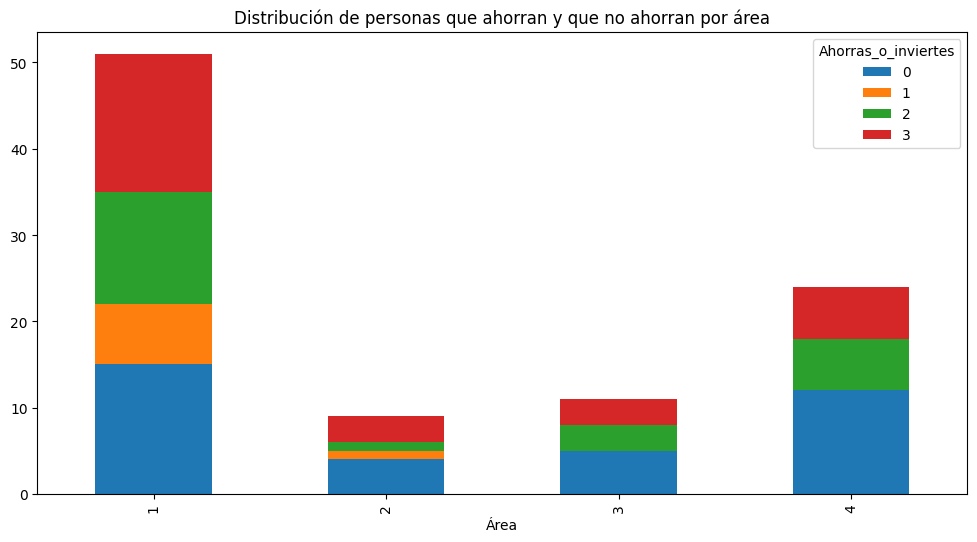

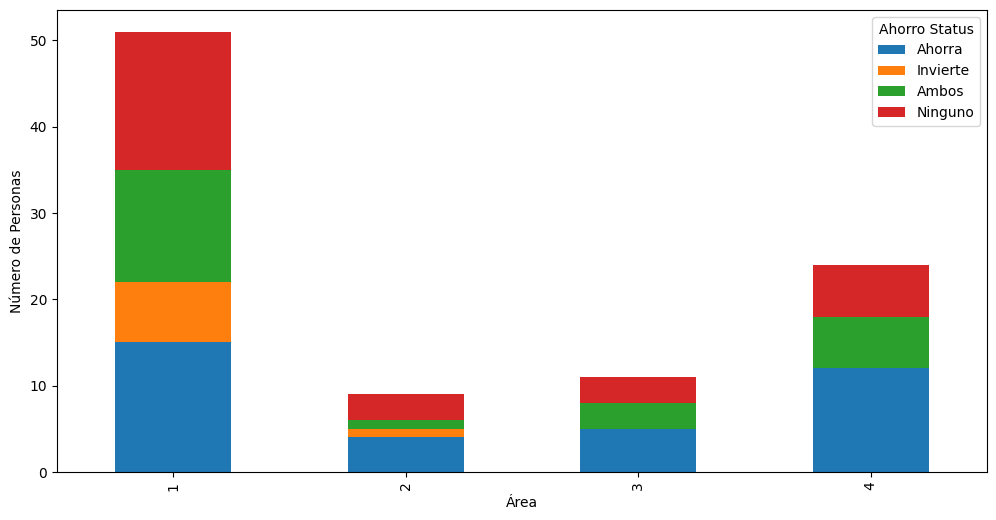

In [ ]:
conteo_ahorro_por_area = df.groupby(['Área', 'Ahorras_o_inviertes']).size().unstack(fill_value=0)

# Graficar el resultado
conteo_ahorro_por_area.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribución de personas que ahorran y que no ahorran por área')
ax = conteo_ahorro_por_area.plot(kind='bar', stacked=True, figsize=(12, 6))
ax.legend(title='Ahorro Status', labels=['Ahorra', 'Invierte', 'Ambos', 'Ninguno'])
plt.xlabel('Área')
plt.ylabel('Número de Personas')
plt.show()


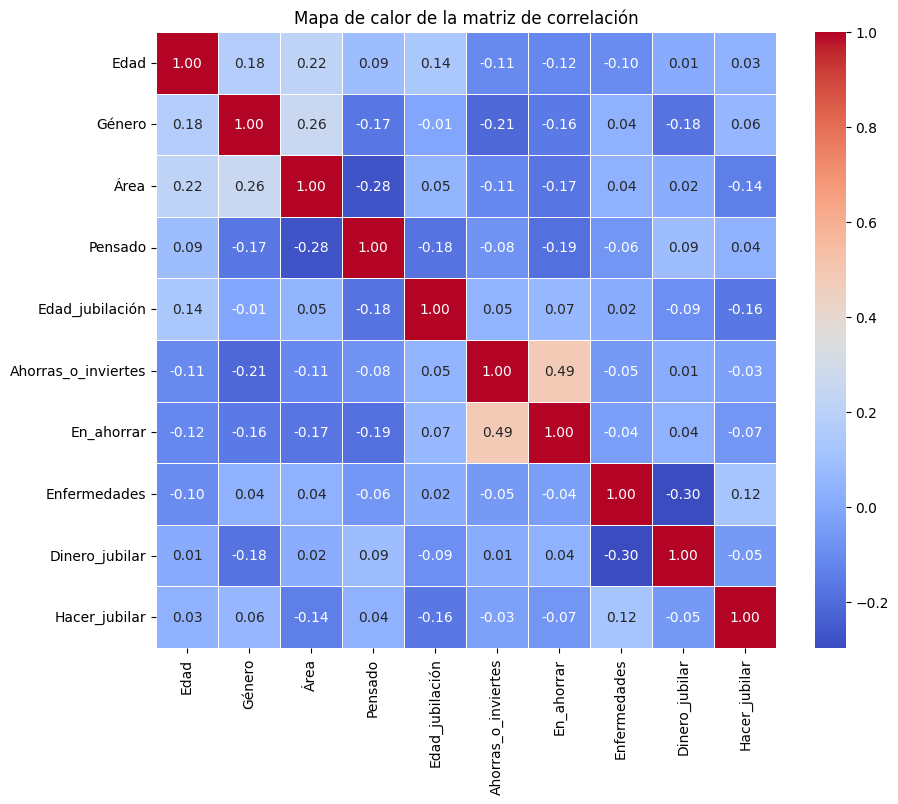

In [ ]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Mapa de calor de la matriz de correlación")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Edad                 95 non-null     int64
 1   Género               95 non-null     int64
 2   Área                 95 non-null     int64
 3   Pensado              95 non-null     int64
 4   Edad_jubilación      95 non-null     int64
 5   Ahorras_o_inviertes  95 non-null     int64
 6   En_ahorrar           95 non-null     int64
 7   Enfermedades         95 non-null     int64
 8   Dinero_jubilar       95 non-null     int64
 9   Hacer_jubilar        95 non-null     int64
dtypes: int64(10)
memory usage: 7.5 KB


In [ ]:
!pip install openpyxl

# Supongamos que tu DataFrame se llama df
df.to_excel('Cuestionario.xlsx', index=False)

from google.colab import files

files.download('Cuestionario.xlsx')


In [ ]:
sienf = df.loc[(df['Enfermedades'] == 1)]
sienf.head()

,Edad,Género,Área,Pensado,Edad_jubilación,Ahorras_o_inviertes,En_ahorrar,Enfermedades,Dinero_jubilar,Hacer_jubilar
0,21,1,1,1,3,2,1,1,3,4
1,21,1,1,1,2,0,5,1,2,1
2,22,1,1,1,3,0,9,1,2,4
6,21,1,1,1,2,0,2,1,2,3
9,17,1,1,1,1,3,10,1,3,1


In [ ]:
sienf.shape

(25, 10)

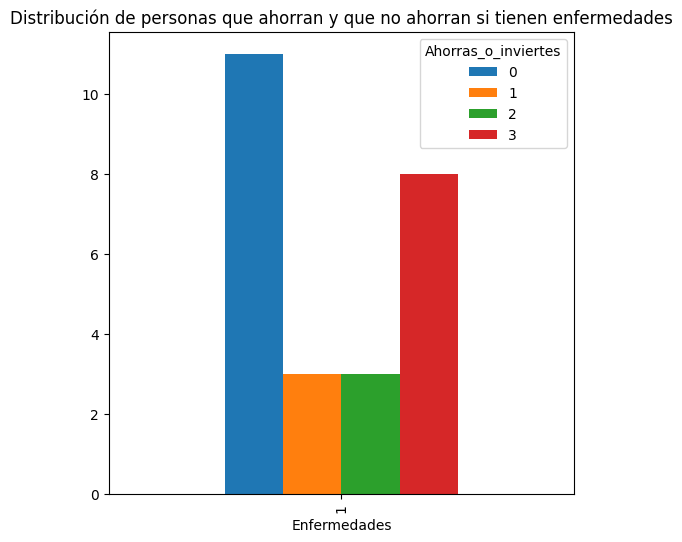

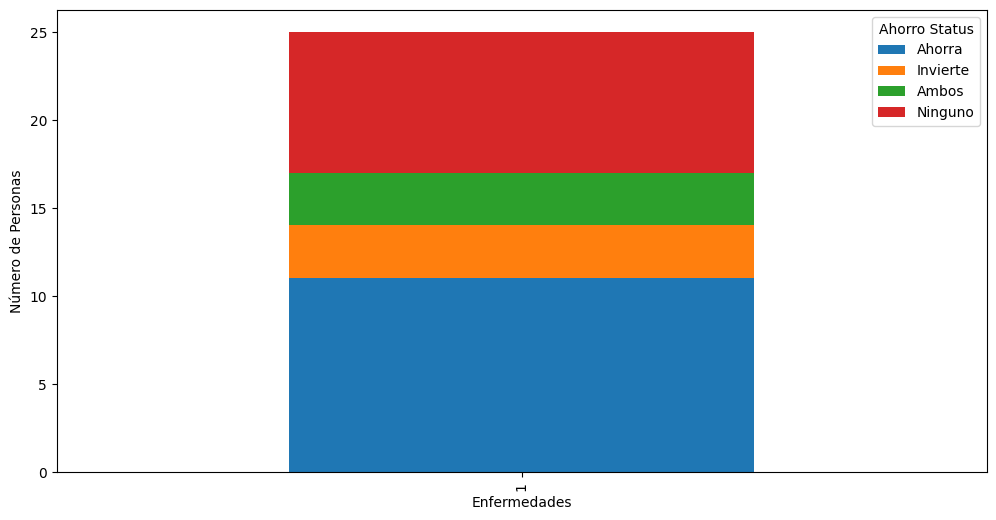

In [ ]:
conteo_ahorro_por_enfermedad = sienf.groupby(['Enfermedades', 'Ahorras_o_inviertes']).size().unstack(fill_value=0)

# Graficar el resultado
conteo_ahorro_por_enfermedad.plot(kind='bar', figsize=(6, 6))
plt.title('Distribución de personas que ahorran y que no ahorran si tienen enfermedades')
ax = conteo_ahorro_por_enfermedad.plot(kind='bar', stacked=True, figsize=(12, 6))
ax.legend(title='Ahorro Status', labels=['Ahorra', 'Invierte', 'Ambos', 'Ninguno'])
plt.xlabel('Enfermedades')
plt.ylabel('Número de Personas')
plt.show()

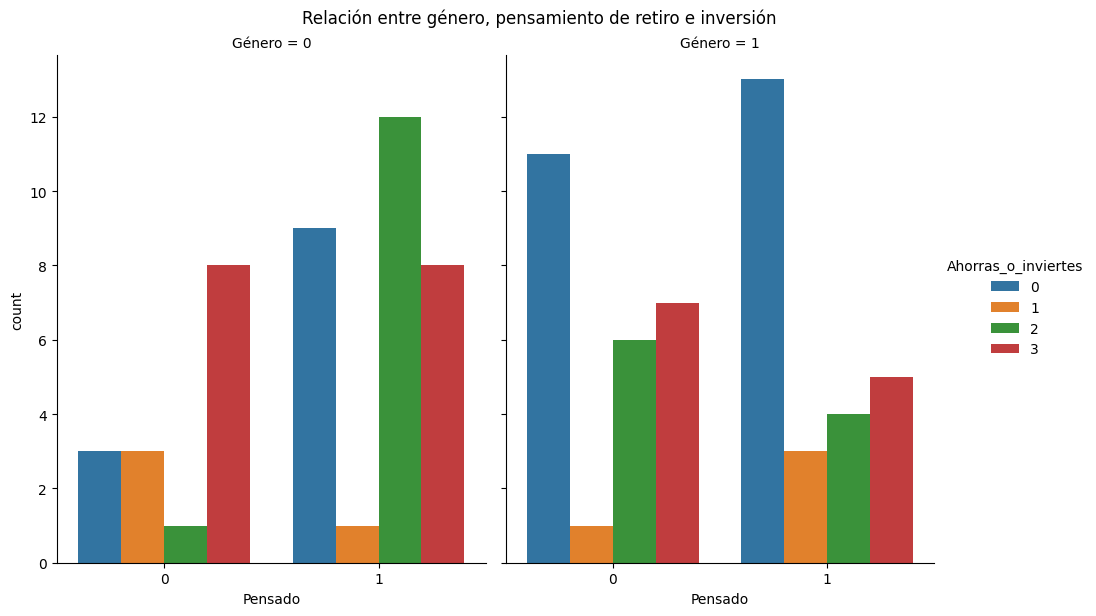

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame se llama df y tienes columnas 'genero', 'pensamiento_retiro' y 'inversion'
# Asegúrate de tener tus datos cargados en el DataFrame antes de ejecutar este código

# Crear un diagrama de dispersión categórico
sns.catplot(x='Pensado', hue='Ahorras_o_inviertes', col='Género', data=df, kind='count', height=6, aspect=0.8)
plt.suptitle('Relación entre género, pensamiento de retiro e inversión', y=1.02)

plt.show()


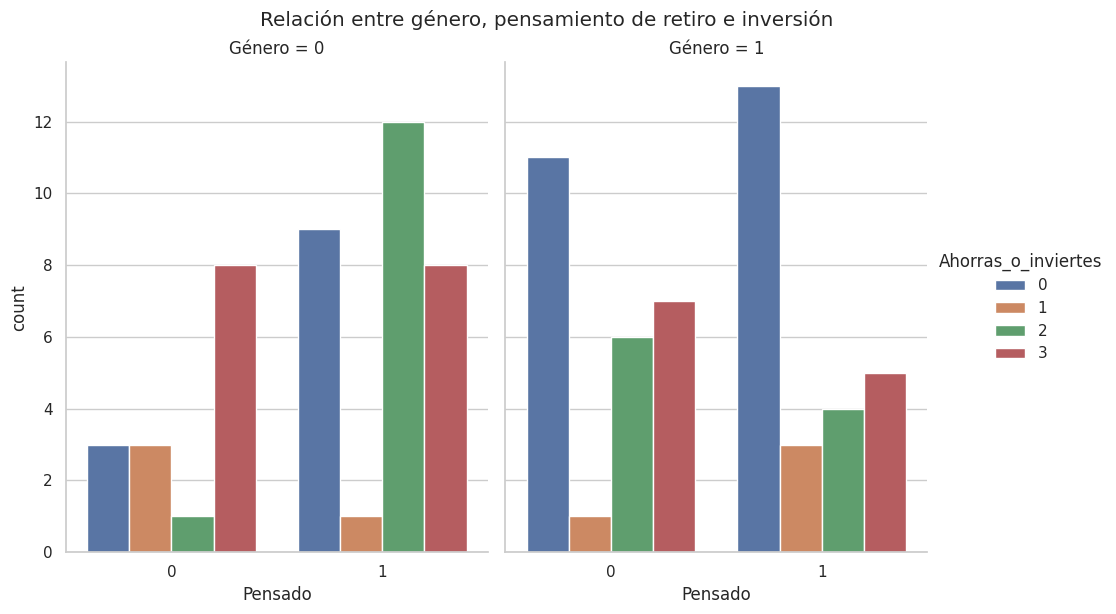

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame se llama df y tienes columnas 'Género', 'Pensado' y 'Ahorras_o_inviertes'
# Asegúrate de tener tus datos cargados en el DataFrame antes de ejecutar este código

# Configurar el estilo de fondo
sns.set_theme(style='whitegrid')

# Definir una paleta de colores personalizada
mi_paleta = sns.color_palette("deep")

# Crear un diagrama de dispersión categórico con colores y textura personalizados
g = sns.catplot(x='Pensado', hue='Ahorras_o_inviertes', col='Género', data=df, kind='count', height=6, aspect=0.8, palette=mi_paleta)
plt.suptitle('Relación entre género, pensamiento de retiro e inversión', y=1.02)

plt.show()


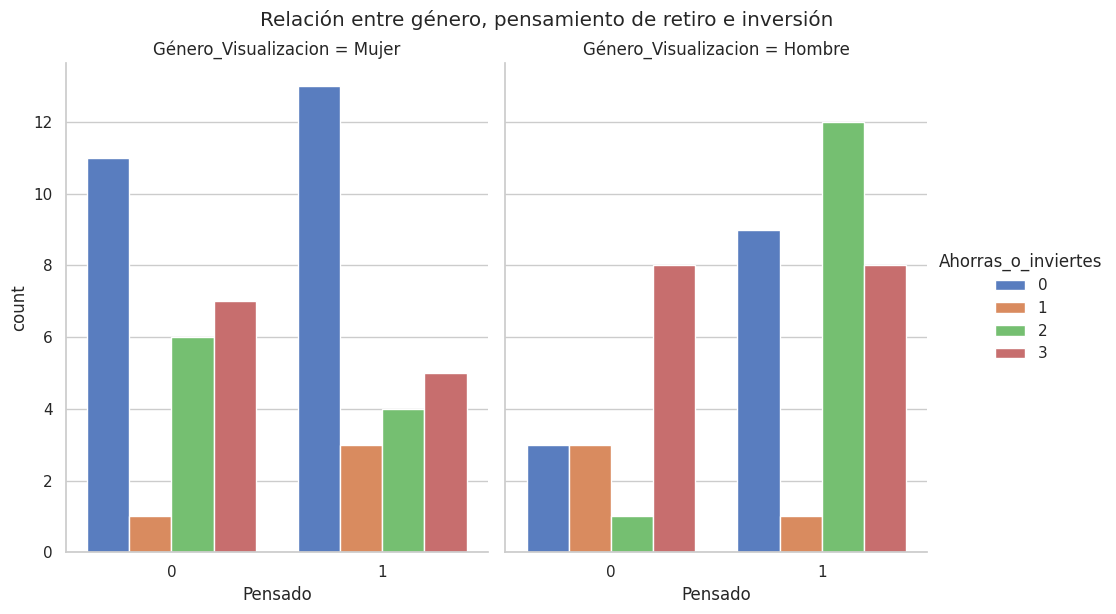

In [ ]:
df_copia = df.copy()
df_copia['Género_Visualizacion'] = df_copia['Género'].replace({0: 'Hombre', 1: 'Mujer'})

# Configurar el estilo de fondo
sns.set_theme(style='whitegrid')

# Definir una paleta de colores personalizada
mi_paleta = sns.color_palette("muted")

# Crear un diagrama de dispersión categórico con colores y textura personalizados
sns.catplot(x='Pensado', hue='Ahorras_o_inviertes', col='Género_Visualizacion', data=df_copia, kind='count', height=6, aspect=0.8, palette=mi_paleta)
plt.suptitle('Relación entre género, pensamiento de retiro e inversión', y=1.02)

plt.show()
